In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
df = pd.read_csv(r'C:\Users\User\Downloads\datasets\Bank_Churn.csv')
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
#create a duplicate table for editing 
dataframe = df

In [3]:
#remove duplicates if they exist
dataframe=dataframe.drop_duplicates()

In [5]:
#loop through each row and drop columns where balance is zero and credit card has been cancelled 
for x in dataframe.index:
    if dataframe.loc[x,'Exited']==1 and dataframe.loc[x,'Balance']==0:
        dataframe.drop(x,inplace=True)

In [6]:
dataframe

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
#change the values of the specified columns to Y & N 
dataframe['Exited'] = dataframe['Exited'].map({1:'Y',0:"N"})
dataframe['IsActiveMember'] = dataframe['IsActiveMember'].map({1:'Y',0:"N"})
dataframe['HasCrCard'] = dataframe['HasCrCard'].map({1:'Y',0:"N"})

In [8]:
# Rename specific columns using the rename() function
dataframe = dataframe.rename(columns={'Geography': 'Country'})

In [9]:
# Define the function to  change credit score values to a rating system
def map_value(x):
    if 0 <= x < 580:
        return "poor"
    elif 580 <= x < 670:
        return "fair"
    elif 670 <= x < 740:
        return "good"
    elif 740 <= x < 800:
        return "very good"
    else:
        return "excellent" 
dataframe['CreditScore'] = dataframe['CreditScore'].apply(map_value)

In [10]:
#change entries in customer ID column from integer to string datatype
dataframe['CustomerId'] = dataframe['CustomerId'].astype(str)

In [11]:
#replacing the first 3 chars of the entries in column 1 with the 
#first 3 chars of the entries in column 2
dataframe['CustomerId'] = dataframe.apply(lambda x: x['Surname'][:3] + x['CustomerId'][3:], axis=1)

In [12]:
dataframe

,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,Hil47311,Hill,fair,Spain,Female,41,1,83807.86,1,N,Y,112542.58,N
2,Oni19304,Onio,poor,France,Female,42,8,159660.80,3,Y,N,113931.57,Y
3,Bon01354,Boni,good,France,Female,39,1,0.00,2,N,N,93826.63,N
4,Mit37888,Mitchell,excellent,Spain,Female,43,2,125510.82,1,Y,Y,79084.10,N
5,Chu74012,Chu,fair,Spain,Male,44,8,113755.78,2,Y,N,149756.71,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,Woo19294,Wood,excellent,France,Female,29,2,0.00,2,N,N,167773.55,N
9995,Obi06229,Obijiaku,very good,France,Male,39,5,0.00,2,Y,N,96270.64,N
9996,Joh69892,Johnstone,poor,France,Male,35,10,57369.61,1,Y,Y,101699.77,N
9998,Sab82355,Sabbatini,very good,Germany,Male,42,3,75075.31,2,Y,N,92888.52,Y


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
df2=df

In [50]:
dataframe = dataframe.set_index(['Gender','Country'])

In [51]:
dataframe

CustomerId    Surname CreditScore  Age  Tenure    Balance  \
Gender Country                                                             
Female Spain     Hil47311       Hill        fair   41       1   83807.86   
       France    Oni19304       Onio        poor   42       8  159660.80   
       France    Bon01354       Boni        good   39       1       0.00   
       Spain     Mit37888   Mitchell   excellent   43       2  125510.82   
Male   Spain     Chu74012        Chu        fair   44       8  113755.78   
...                   ...        ...         ...  ...     ...        ...   
Female France    Woo19294       Wood   excellent   29       2       0.00   
Male   France    Obi06229   Obijiaku   very good   39       5       0.00   
       France    Joh69892  Johnstone        poor   35      10   57369.61   
       Germany   Sab82355  Sabbatini   very good   42       3   75075.31   
Female France    Wal28319     Walker   very good   28       4  130142.79   

                NumOfProducts HasCrCard IsActiveMember  EstimatedSalary Exited  
Gender Country                                                                  
Female Spain                1         N              Y        112542.58      N  
       France               3         Y              N        113931.57      Y  
       France               2         N              N         93826.63      N  
       Spain                1         Y              Y         79084.10      N  
Male   Spain                2         Y              N        149756.71      Y  
...                       ...       ...            ...              ...    ...  
Female France               2         N              N        167773.55      N  
Male   France               2         Y              N         96270.64      N  
       France               1         Y              Y        101699.77      N  
       Germany              2         Y              N         92888.52      Y  
Female France               1         Y              N         38190.78      N  

[9500 rows x 11 columns]

In [58]:
dataframe = dataframe.sort_values(by=['Gender', 'Country','Balance'], ascending=[True, True,False])

In [59]:
dataframe

CustomerId      Surname CreditScore  Age  Tenure    Balance  \
Gender Country                                                               
Female France    To 15622       To Rot        fair   57       3  238387.56   
       France    Moo69818        Moore   excellent   37       3  212778.20   
       France    Mac71256    Macartney   excellent   35       1  211774.31   
       France    Bur09920        Burke        poor   33       2  208165.53   
       France    Coa27971       Coates        poor   32       8  206663.75   
...                   ...          ...         ...  ...     ...        ...   
Male   Spain     Joh52467      Johnson        good   34       3       0.00   
       Spain     Chi18064         Chia        fair   29       2       0.00   
       Spain     Hop72374     Hopetoun        good   36       1       0.00   
       Spain     McM05622     McMillan   excellent   28       4       0.00   
       Spain     Chu57105  Chukwualuka        good   36       2       0.00   

                NumOfProducts HasCrCard IsActiveMember  EstimatedSalary Exited  
Gender Country                                                                  
Female France               1         N              Y        147964.99      Y  
       France               1         N              Y         69372.88      N  
       France               1         Y              N        188574.12      Y  
       France               1         N              N         50774.81      Y  
       France               1         N              N         16281.94      N  
...                       ...       ...            ...              ...    ...  
Male   Spain                2         Y              Y         77047.78      N  
       Spain                2         N              N        117173.80      N  
       Spain                2         N              Y        108377.82      N  
       Spain                2         Y              Y        179436.60      N  
       Spain                1         Y              N        195192.40      N  

[9500 rows x 11 columns]

In [60]:
import seaborn as sns

In [61]:
dataframe.describe(include = 'all')

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9500,9500,9500,9500.000000,9500.000000,9500.000000,9500.000000,9500,9500,9500.000000,9500
unique,9498,2855,5,NaN,NaN,NaN,NaN,2,2,NaN,2
top,Bar71148,Smith,fair,NaN,NaN,NaN,NaN,Y,Y,NaN,N
freq,2,31,3161,NaN,NaN,NaN,NaN,6703,4971,NaN,7963
mean,NaN,NaN,NaN,38.605368,5.023579,80511.462408,1.531579,NaN,NaN,100001.195178,NaN
std,NaN,NaN,NaN,10.433369,2.890221,61434.815400,0.566601,NaN,NaN,57484.730366,NaN
min,NaN,NaN,NaN,18.000000,0.000000,0.000000,1.000000,NaN,NaN,11.580000,NaN
25%,NaN,NaN,NaN,32.000000,3.000000,0.000000,1.000000,NaN,NaN,50908.022500,NaN
50%,NaN,NaN,NaN,37.000000,5.000000,100738.500000,2.000000,NaN,NaN,100134.325000,NaN
75%,NaN,NaN,NaN,43.000000,8.000000,128984.242500,2.000000,NaN,NaN,149190.167500,NaN


In [63]:
import matplotlib.pyplot as plt

In [69]:
dataframe.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [70]:
df5=dataframe

In [80]:
df5['Exited'] = df5['Exited'].map({'Y':1,"N":0})
df5['IsActiveMember'] = df5['IsActiveMember'].map({'Y':1,"N":0})
df5['HasCrCard'] = df5['HasCrCard'].map({'Y':1,"N":0})

In [79]:
def map_value(x):
    if x=='poor':
        return 1
    elif x=='fair':
        return 2
    elif x=='good':
        return 3
    elif x=='very good':
        return 4
    else:
        return 5
df5['CreditScore'] = df5['CreditScore'].apply(map_value)

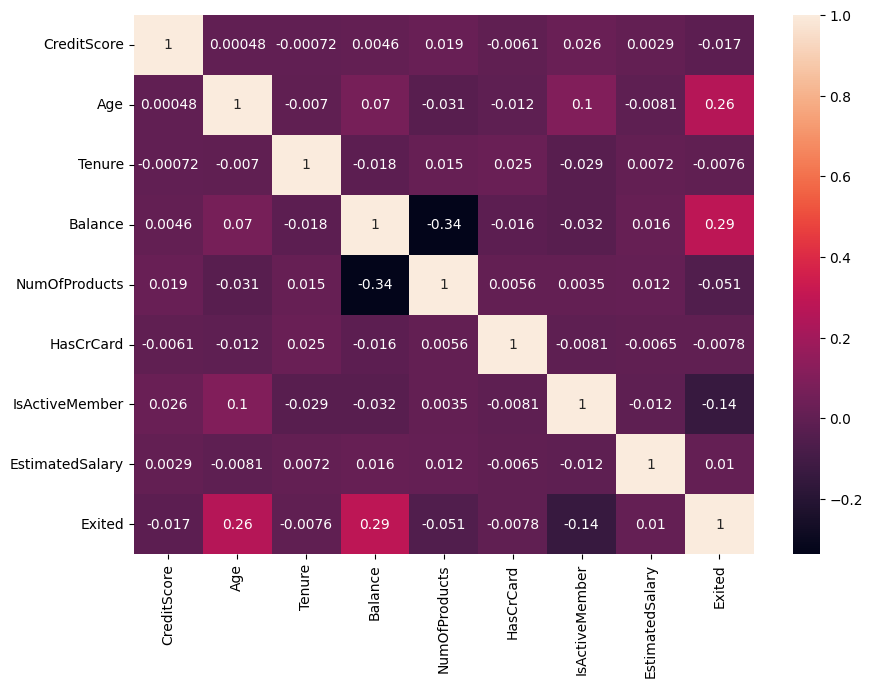

In [78]:
#maooing out correlations between columns
sns.heatmap(df5[['CreditScore', 'Age','Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
'Exited']].corr(),annot=True)
plt.rcParams['figure.figsize']=(20,7)
plt.show() 